In [1]:
import pandas as pd
traindf = pd.read_csv("train.csv", encoding="utf-8")
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
import pandas as pd
testdf = pd.read_csv("test.csv", encoding="utf-8")
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# 1.填缺失值,有大小關係填中位數
med = traindf.median()
traindf = traindf.fillna(med)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 測試資料填補,千萬不要重新算,用訓練
testdf = testdf.fillna(med)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [6]:
# 缺失值,類別-> 最常出現的字
most = traindf["Embarked"].value_counts().idxmax()
traindf["Embarked"] = traindf["Embarked"].fillna(most)
traindf.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
# 缺失值,類別-> 最常出現的字
testdf["Embarked"] = testdf["Embarked"].fillna(most)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
#對類別(2種)特徵 -> one hot encoding (不能承認他們有大小關係)
#轉0,1,2承認大小關係
dummy = pd.get_dummies(traindf["Embarked"])
#axis =0 直的接 axis =1 橫的接
traindf = pd.concat([traindf, dummy], axis=1)
traindf


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [9]:
dummy = pd.get_dummies(testdf["Embarked"])
testdf = pd.concat([testdf, dummy], axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1


In [10]:
# sex 雖然可以不用做, 偷懶順勢做一下
dummy = pd.get_dummies(traindf["Embarked"])
traindf = pd.concat([traindf, dummy], axis=1)
dummy = pd.get_dummies(testdf["Embarked"])
testdf = pd.concat([testdf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,1,0,0


In [11]:
#3.處理較困難的
mid = "Braund, Mr. Owen Harris".split(",")[-1].split(".")[0].replace(" ","")
mid

'Mr'

In [12]:
# pandas apply(流程名字)
#如果遇到種類很多的時候,看一下每種有幾個
def nameflow(s):
    mid = s.split(",")[-1].split(".")[0].replace(" ","")
    return mid
name = traindf["Name"].apply(nameflow)
pd.crosstab(name, traindf['Survived']).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [13]:
def nameflow(s):
    mid = s.split(",")[-1].split(".")[0].replace(" ","")
    if mid == "Miss":
       return "Miss"
    elif mid =="Mr":
        return "Mr"
    elif mid =="Mrs":
        return "Mrs"
    else:
        return "Throw"
name = traindf["Name"].apply(nameflow)
dummy = pd.get_dummies(name)
traindf = pd.concat([traindf, dummy], axis=1)
traindf


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,C,Q,S,C,Q,S,Miss,Mr,Mrs,Throw
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,1,0,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,1,0,0,1,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,0,0,1,0,0,1,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,1,0,0,1,0,0,0,1,0,0


In [14]:
name = testdf["Name"].apply(nameflow)
dummy = pd.get_dummies(name)
testdf = pd.concat([testdf, dummy], axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,C,Q,S,C,Q,S,Miss,Mr,Mrs,Throw
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,1,0,0,1,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,1,0,0,1,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,1,0,0,1,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,1,0,0,1,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,...,0,0,1,0,0,1,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,0,0,1,0,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,1,0,0,1,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,...,0,0,1,0,0,1,0,1,0,0


In [15]:
#要丟東西,印一下欄位是哪些
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'C', 'Q',
       'S', 'Miss', 'Mr', 'Mrs', 'Throw'],
      dtype='object')

In [16]:
# train 先把passengerid drop , test先留著
traindf = traindf.drop(['PassengerId',  'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked',  'Throw'], axis=1)
testdf = testdf.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked',  'Throw'], axis=1)
traindf


,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,C,Q,S,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,0,1,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1,0,0,1,1,0,0
888,0,3,28.0,1,2,23.4500,0,0,1,0,0,1,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,1,0,0,0,1,0


In [17]:
testdf

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,C,Q,S,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,1,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,0,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,0,0,1,0,0,1,0,1,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,0,0
415,1307,3,38.5,0,0,7.2500,0,0,1,0,0,1,0,1,0
416,1308,3,28.0,0,0,8.0500,0,0,1,0,0,1,0,1,0


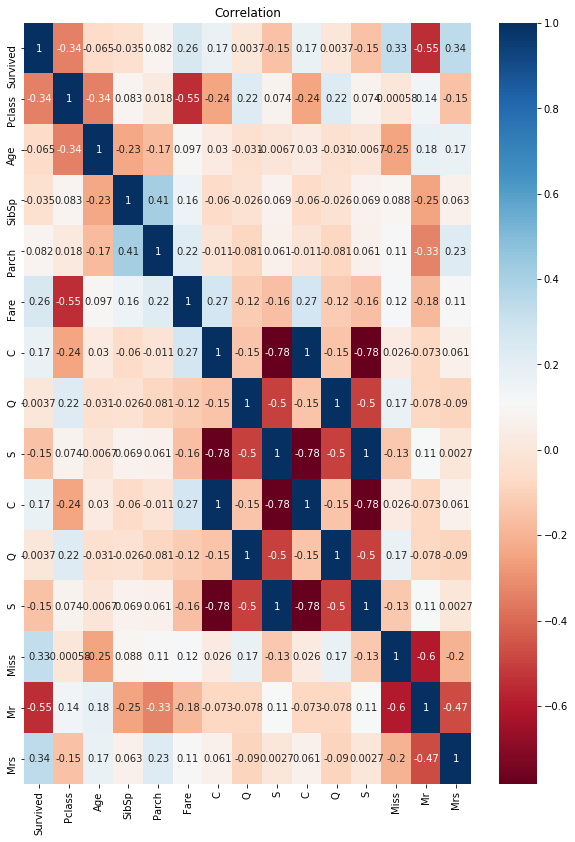

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,14))
plt.title("Correlation")
sns.heatmap(traindf.corr(), annot=True, cmap="RdBu")


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#numpy 處理大量數字
import numpy as np
trainx = traindf.drop(["Survived"], axis=1)
trainy = traindf["Survived"]
#max depth 通常5開始, n_estimators 通常20開始
clf = RandomForestClassifier(max_depth=8, n_estimators=24)
np.average(cross_val_score(clf, trainx, trainy, cv=10))

0.8238701622971286

In [56]:
from sklearn.model_selection import GridSearchCV
p= {
    "max_depth":range(5,11),
    "n_estimators":range(20,30)
}
clf = RandomForestClassifier()
s = GridSearchCV(clf, p, cv=5)
s.fit(trainx, trainy)
print(s.best_params_)
print(s.best_score_)

{'max_depth': 8, 'n_estimators': 24}
0.8327663046889711


In [61]:
testx = testdf.drop(["PassengerId"], axis=1)
testid = testdf["PassengerId"]
clf = RandomForestClassifier(max_depth=6, n_estimators=24)
clf.fit(trainx, trainy)
pre = clf.predict(testx)
result = pd.DataFrame()
result["PassengerId"]= testid
result["Survived"] = pre
result.to_csv("result.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
clf.feature_importances_


array([0.10976738, 0.09423032, 0.0435586 , 0.03375697, 0.16088866,
       0.00844038, 0.00829193, 0.00335596, 0.01493576, 0.00732017,
       0.00586491, 0.11575903, 0.28523701, 0.10859292])

In [63]:
trainx.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'C', 'Q', 'S',
       'Miss', 'Mr', 'Mrs'],
      dtype='object')